In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df_01 = pd.read_csv("../data/selected_M_best6.csv")
df_01 = df_01.drop_duplicates()
print(df_01.head())

   creatinine_phosphokinase  ejection_fraction  serum_creatinine  \
0                       582                 20               1.9   
1                      7861                 38               1.1   
2                       146                 20               1.3   
3                       111                 20               1.9   
4                       160                 20               2.7   

   serum_sodium  smoking  time  Results  
0           130        0     4        1  
1           136        0     6        1  
2           129        1     7        1  
3           137        0     7        1  
4           116        0     8        1  


In [3]:
df_01.describe()

,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,smoking,time,Results
count,299.000000,299.000000,299.00000,299.000000,299.00000,299.000000,299.00000
mean,581.839465,38.083612,1.39388,136.625418,0.32107,130.260870,0.32107
std,970.287881,11.834841,1.03451,4.412477,0.46767,77.614208,0.46767
min,23.000000,14.000000,0.50000,113.000000,0.00000,4.000000,0.00000
25%,116.500000,30.000000,0.90000,134.000000,0.00000,73.000000,0.00000
50%,250.000000,38.000000,1.10000,137.000000,0.00000,115.000000,0.00000
75%,582.000000,45.000000,1.40000,140.000000,1.00000,203.000000,1.00000
max,7861.000000,80.000000,9.40000,148.000000,1.00000,285.000000,1.00000


In [4]:
df_features = list(df_01.columns)
print(df_features)

['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'smoking', 'time', 'Results']


In [5]:
df_01.columns

Index(['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine',
       'serum_sodium', 'smoking', 'time', 'Results'],
      dtype='object')

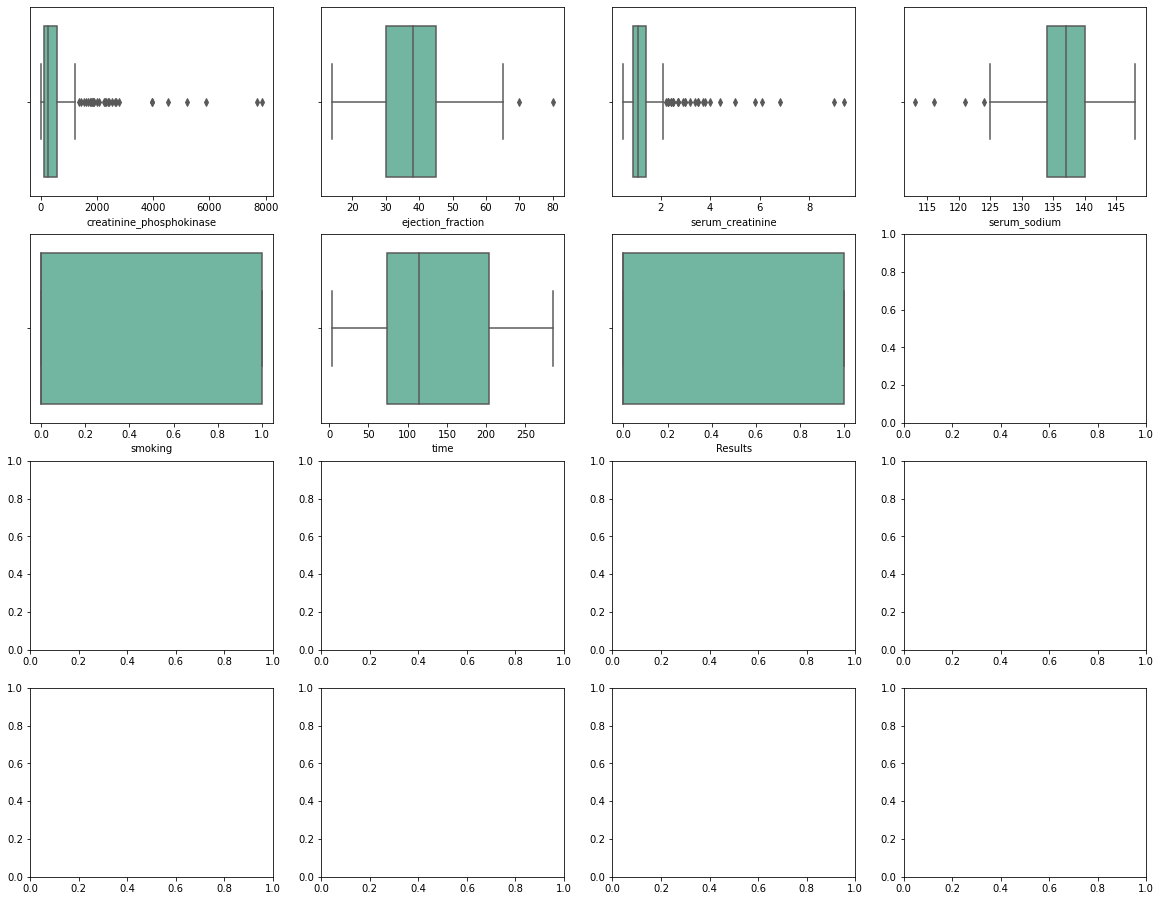

In [6]:
fig, axes = plt.subplots(4,4, figsize=(20,16))
x_,y_ = 0,0
for i, column in enumerate(df_01.columns[0:]):    
    sb.boxplot(x=df_01[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    elif i == 11:
        x_ = 3
        y_ = 0
    else:
        y_ += 1

In [7]:
cols = df_01.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df_01)
df_02 = pd.DataFrame(data=dat, columns=cols)  
print(df_02.head())

Index(['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine',
       'serum_sodium', 'smoking', 'time', 'Results'],
      dtype='object')
   creatinine_phosphokinase  ejection_fraction  serum_creatinine  \
0                  0.071319           0.090909          0.157303   
1                  1.000000           0.363636          0.067416   
2                  0.015693           0.090909          0.089888   
3                  0.011227           0.090909          0.157303   
4                  0.017479           0.090909          0.247191   

   serum_sodium  smoking      time  Results  
0      0.485714      0.0  0.000000      1.0  
1      0.657143      0.0  0.007117      1.0  
2      0.457143      1.0  0.010676      1.0  
3      0.685714      0.0  0.010676      1.0  
4      0.085714      0.0  0.014235      1.0  


In [8]:
x = df_02.drop(["Results"], axis =1);
y = df_02["Results"]
print(y.value_counts())

0.0    203
1.0     96
Name: Results, dtype: int64


(array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  96.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

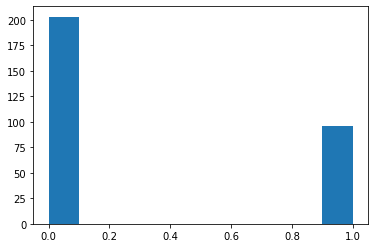

In [9]:
plt.hist(y)

0.0    137
1.0     96
Name: Results, dtype: int64


(array([137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  96.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

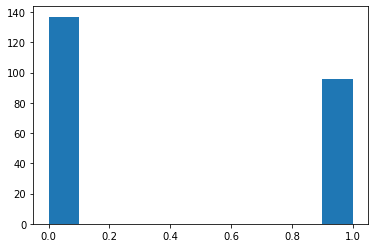

In [10]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.7,random_state = 0)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0.0    137
1.0    137
Name: Results, dtype: int64


(array([137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

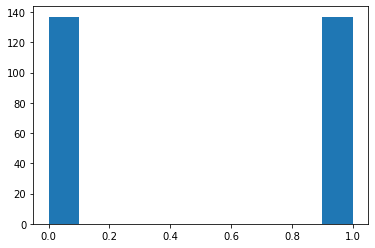

In [11]:
smt = SMOTE(random_state=0)
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [12]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=10)
gridSearchRF.fit(X, Y)
print("Parameters : ", gridSearchRF.best_params_)
print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

Parameters :  {}
Accuracy :  78.770
Standed deviation :  11.513


In [13]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=10)
gridSearchRF.fit(X, Y)
print("Parameters : ", gridSearchRF.best_params_)
print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

Parameters :  {'random_state': 0}
Accuracy :  82.394
Standed deviation :  12.670


In [14]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=10)
gridSearchRF.fit(X, Y)
print("Parameters : ", gridSearchRF.best_params_)
print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

Parameters :  {'n_neighbors': 7}
Accuracy :  82.765
Standed deviation :  10.392


In [15]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=10)
gridSearchRF.fit(X, Y)
print("Parameters : ", gridSearchRF.best_params_)
print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


Parameters :  {'max_iter': 100}
Accuracy :  75.728
Standed deviation :  16.370


In [16]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=10)
gridSearchRF.fit(X, Y)
print("Parameters : ", gridSearchRF.best_params_)
print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


Parameters :  {}
Accuracy :  75.384
Standed deviation :  15.725


In [17]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=10)
gridSearchRF.fit(X, Y)
print("Parameters : ", gridSearchRF.best_params_)
print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


Parameters :  {'kernel': 'poly'}
Accuracy :  82.354
Standed deviation :  13.960


In [18]:
# creating a Random forest classifier

param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

rf = RandomForestClassifier()
gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=10)
gridSearchRF.fit(X, Y)
print("Parameters : ", gridSearchRF.best_params_)
print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 200}
Accuracy :  84.960
Standed deviation :  9.643
